<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 3: Frequency Analysis<br/>
    <small>Date: 09/18/2024 </small><br/>
    <small>Section: 007</small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Yin Matthew Fung [---%]|YMF| 3:00 |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to compute Fourier series expansion and synthesize periodic signals using the expansion in Simulink (26 pts)**: *Derivation and sketch, plots of synthesized signals, questions*||||
|**Understanding of modulator and CT system analysis (26 pts)**: *Output plots, questions*||||
|**Implementation of DTFT (21 pts)**: *Python function, DTFT’s magnitude and phase plots*||||
|**DT system analysis (27 pts)**: *Exercises in 5.2, completed block diagram, table of measurements, impulse and frequency response*||||

In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. For each of these two signals, do the following on a blank sheet of paper (or type the equations in the Markdown cell if you are familiar with LaTex):**
* **Compute the Fourier series expansion in the form**
\begin{equation}
    s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)
\end{equation}
where $f_0=\frac{1}{T_0}$.

    **Hint :**You may want to use one of the following references:

    Sec. 4.1 of “Digital Signal Processing”, by Proakis and Manolakis, 1996;

    Sec. 4.2 of “Signals and Systems”, by A. Oppenheim and A. Willsky, 1983;

    Sec. 3.3 of “Signals and Systems”, A. Oppenheim and A. Willsky, 1997.

    Note that in the expression above, the function in the summation is $\sin(2\pi kf_0 t + \theta k )$, rather than a complex sinusoid. The formulas in the above references must be modified to accommodate this. You can compute the cos/sin version of the Fourier series, then convert the coefficients.

For signal 1:
\begin{equation}
    s(t)=0.5 +\sum_{k=1,3,5...}^\infty \frac{2}{\pi k} \sin(\pi k t)
\end{equation}

For signal 2:
\begin{equation}
    s(t)=0.5 + \sum_{k=1,5,9...}^\infty \frac{2}{\pi k} \sin(\pi k t + \frac{\pi}{2}) + \sum_{k=3,7,11...}^\infty \frac{-2}{\pi k} \sin(\pi k t + \frac{\pi}{2}) 
\end{equation}

**2. Write code to approximate the two signals using the Fourier series expansion above. Use 200 (instead of infinite number of) Sine waves. Then, plot these two signals.**

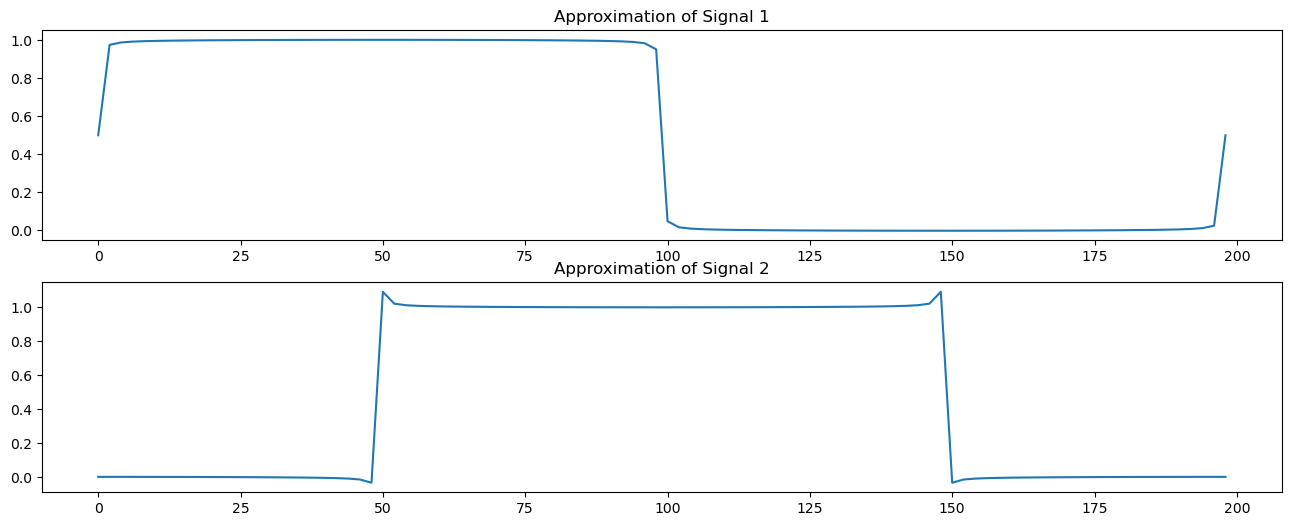

In [289]:
# write your code here

t1 = np.linspace(0, 2, 100)  # Time vector for Signal 1
num_sinwaves = np.arange(0,200,2)
t2 = np.linspace(-0.5, 0.5, 100)  # Time vector for Signal 2


s1_approx = 0.5  
s2_approx = 0.5  


ak = np.ones(200)  # Placeholder for actual coefficients
bk = np.zeros(200)  # Placeholder for actual sine coefficients


for k in range(1, 201, 2):
    s1_approx +=  2 / (np.pi * k) * (np.sin(np.pi * k * t1))

# Signal 2 approximation
for i in range(1, 201, 4):
    s2_approx += 2 / (np.pi * i) * np.sin(2 * i * np.pi * t2 + np.pi / 2)
for i in range(3, 201, 4):
    s2_approx += -2 / (np.pi * i) * np.sin(2 * i * np.pi * t2 + np.pi / 2)


# Plot both signals
plt.subplot(2, 1, 1)
plt.plot(num_sinwaves, s1_approx)
plt.title("Approximation of Signal 1")

plt.subplot(2, 1, 2)
plt.plot(num_sinwaves, s2_approx)
plt.title("Approximation of Signal 2")

plt.show()



# t1 = np.linspace(0, 2, 201)
# y_t1 = (abs(t1) <= 0.5).astype(float)
# t2 = np.linspace(-0.5, 0.5, 201)
# y_t2 = (abs(t2) <= 0.5).astype(float)

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Hand in plots of the Spectrum Analyzer output for each of the three synthesized waveforms.** 

Original signal from Simulink: 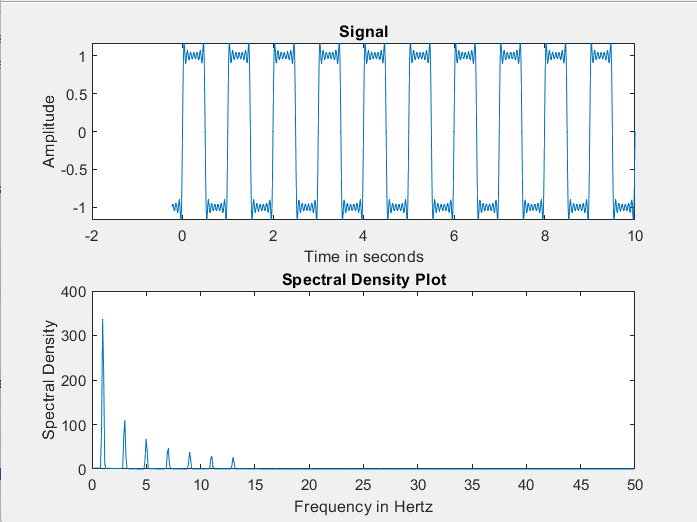

Signal 1 from Exercise 2.1: 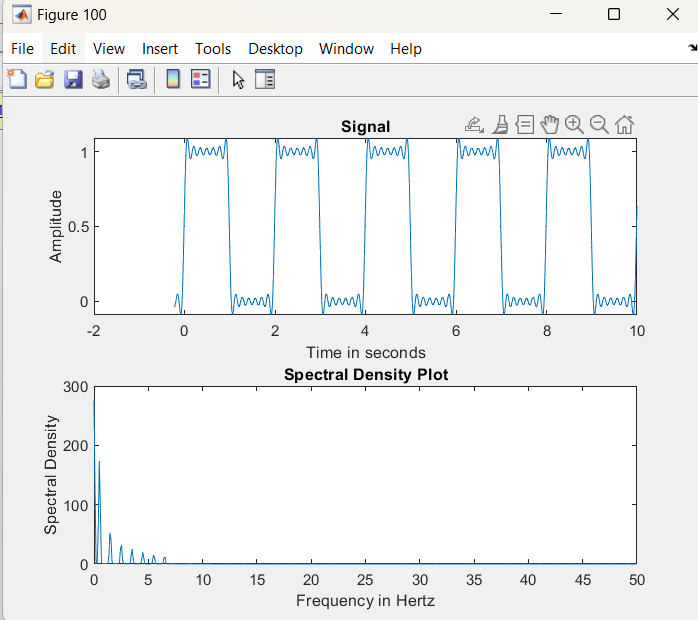

Signal 2 from Exercise 2.1: 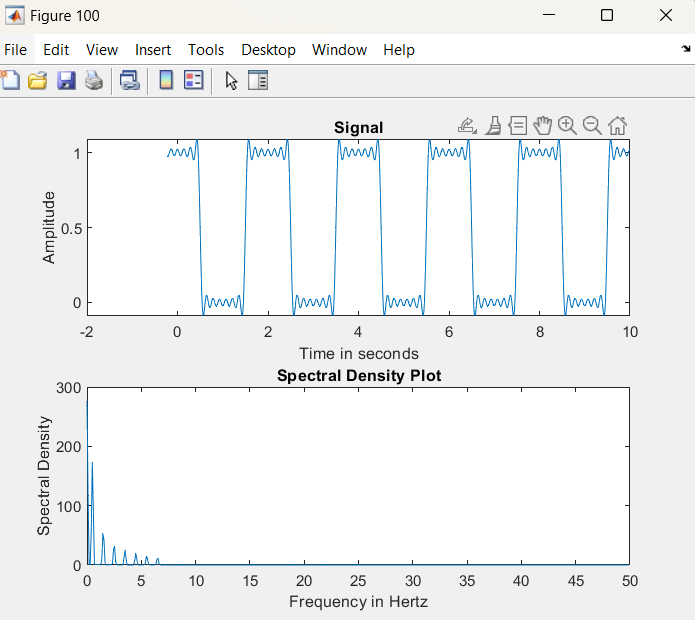

**2. For each case in Q1, comment on how the synthesized waveform differs from the desired signal,and on the structure of the spectral density.**

The synthesized waveform differs from the desired signal since the waveforms seem to repeat the rectangular function on every period, whereas plotting the approximate signal only gave us "one rectangle". The signal in the synthesized waveform also seems noiser than just a flat line on the desired signal. As for the structure of the spectral density, the density of the triangular waves seems to be far more dense amongst our two signals, as opposed to the relatievly spread out density of the original MATLAB waveform. 

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Hand in plots of the output of the *Spectrum Analyzer* for each signal.**

Output of signal 1: 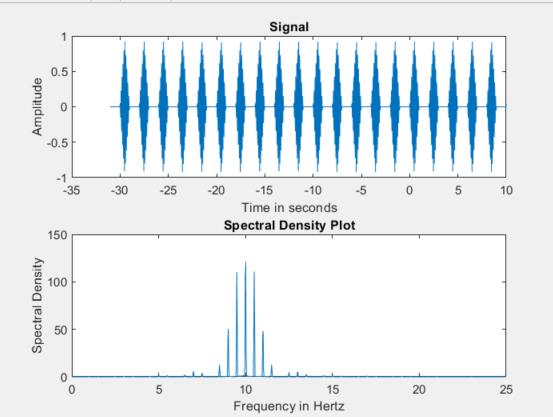

Output of signal 2: 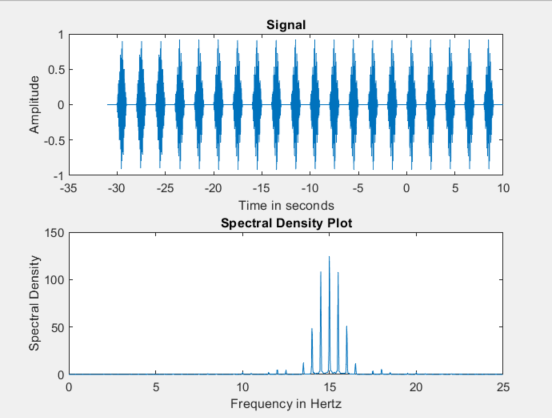

Output of signal 3: 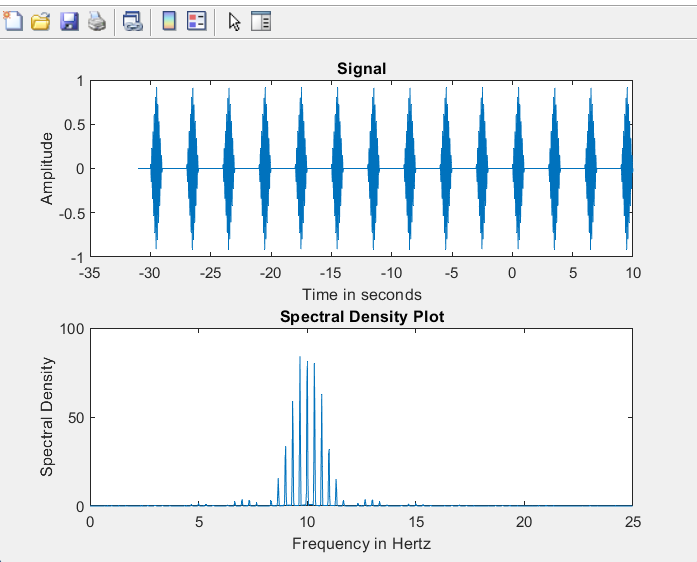

Output of signal 4: 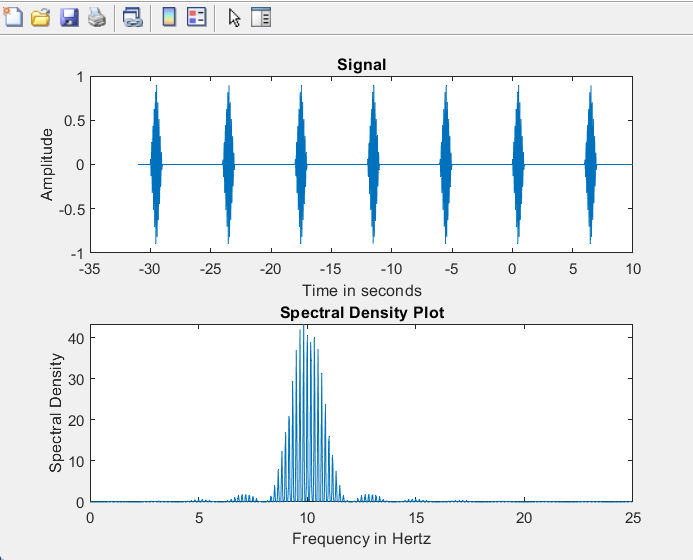

**2. What effect does changing the modulating frequency have on the spectral density?**

The spectral density will center on whatever the modulating frequency is. Basically, if the modulating frequency is x Hz, then the spectral density will also be highest at x Hz.

**3. Why does the spectrum have a comb structure and what is the spectral distance between impulses? Why?**

The spectrum has a comb structure since it is depicting a periodic sinusoidal signal. The spectral distance between impulses is reflective of the reciprocal of 1 / period, which is the fundamental frequency of the signal. This happens because the harmonics of the signal are occuring at multiples of the fundamental frequency, which explains their spacing.

**4. What would happen to the spectral density if the period of the triangle pulse were to
increase toward infinity? (in the limit)**  

The spectral density would probably sprawl and it wouldn't be a conclusive result.

<h3 style="color:red;"><left>Exercise 4.3</left></h3>

**1. Hand in the printout of the output of the Network Analyzer (magnitude and phase of the
frequency response, and the impulse response).**

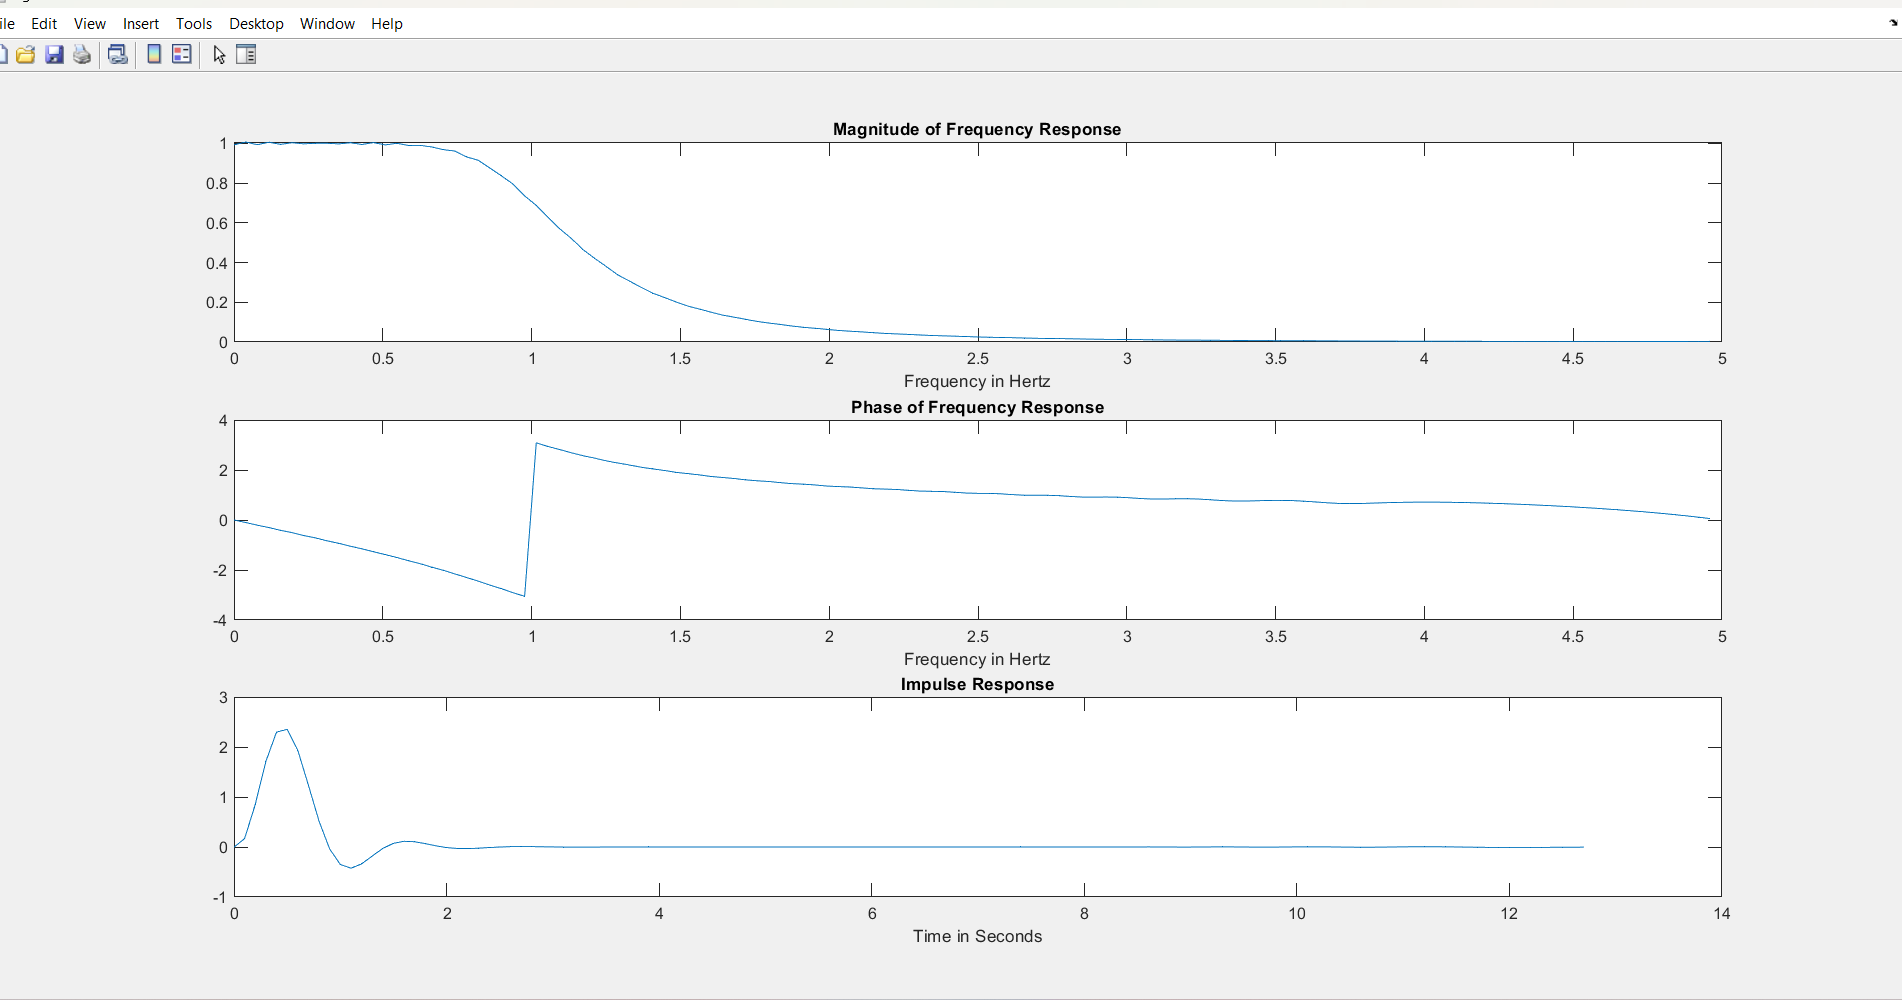

**2. Hand in the plot of the impulse response obtained using a unit step.**

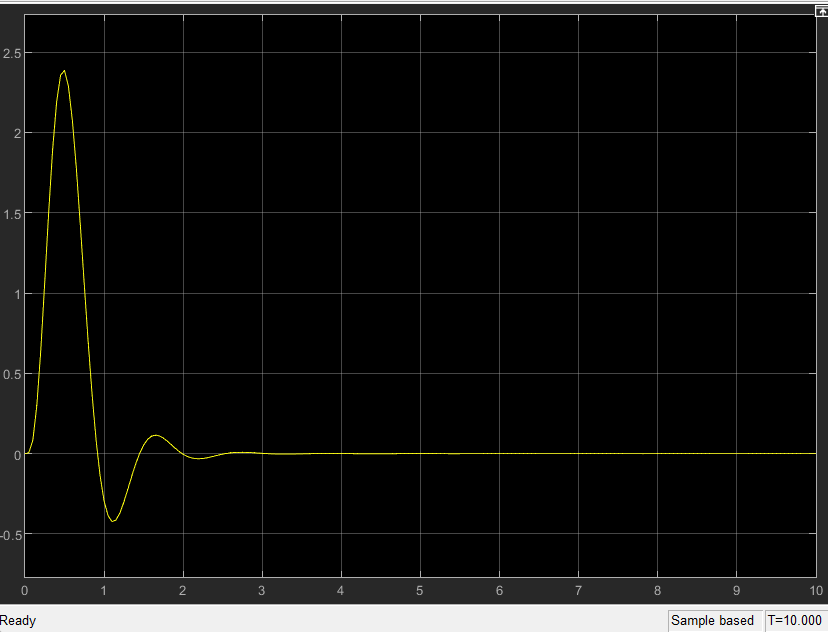

**3. What are the advantages and disadvantages of each method?**

For the former method, it is more advantageous when measuring frequencies with an extended range. The result would probably also me more accurate since there is a feedback system. However, the downside is it requires more computational power and may take a longer time to generate results. The latter method, meanwhile, leads by using a simpler system and faster calculations. It is easier to implement with a more intuitive view of the system. However, the disadvantages is that it may be less accurate and the results may be limited when it comes to non-ideal systems. 

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Complete the follwing function that computes the DTFT of a discrete-time signal.** 
```python
def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    pass
```
**Note that if ```x``` is a vector of length $N$, then its DTFT is computed by**

\begin{equation}
    X(\omega)=\sum_{n=0}^{N-1}x[n]e^{-jw(n+n0)}
\end{equation}

**where $w$ is a vector that contains the frequencies from $-\pi$ to $\pi$.**

**Hint:** In Python, ```1j``` is defined as $\sqrt{-1}$. Use `np.exp(x)` to calculate $e^x$.

In [144]:
def DTFT(x, n0, w):
    X = 0
    for i in range(0, len(x)):
        X += x[i] * np.exp(-1j * w * (i + n0))
        # print(X)
    return X
    

**2. For the following signals** 

* $x[n]=\delta[n]$
* $x[n]=\delta[n-5]$
* $x[n]=(0.5)^nu[n]$

**use your DTFT function to compute $X(\omega)$, and plots its magnitude and phase.**

**Hint**: Use `np.power(a,b)` to calculate $a^b$. Use ```np.abs()``` and ```np.angle()``` to compute the magnitude and phase.

Text(0, 0.5, 'Phase')

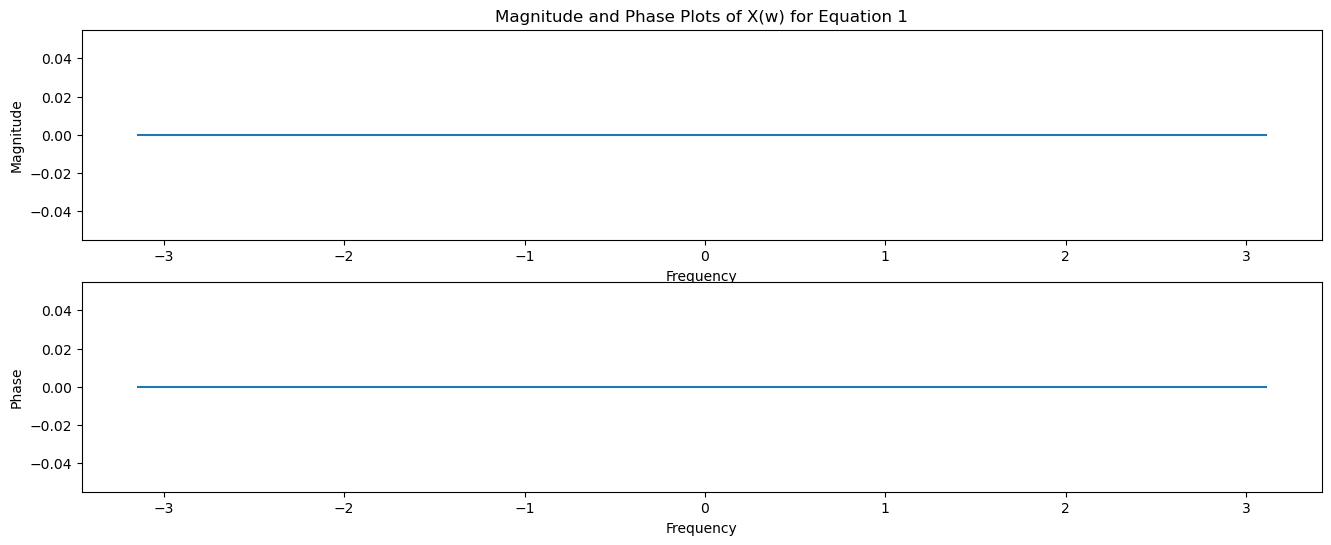

In [146]:
# write your code here
w = np.arange(-np.pi, np.pi, 0.05)
delta_function = np.where(w == 0, 1, 0)
X_51_2_1 = DTFT(delta_function, 0, w)

magnitude_51_2_1 = np.abs(X_51_2_1)
angle_51_2_1 = np.angle(X_51_2_1)

plt.subplot(2,1,1)
plt.plot(w, magnitude_51_2_1)
plt.title("Magnitude and Phase Plots of X(w) for Equation 1")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")


plt.subplot(2,1,2)
plt.plot(w, angle_51_2_1)
plt.xlabel("Frequency")
plt.ylabel("Phase")

Text(0, 0.5, 'Phase')

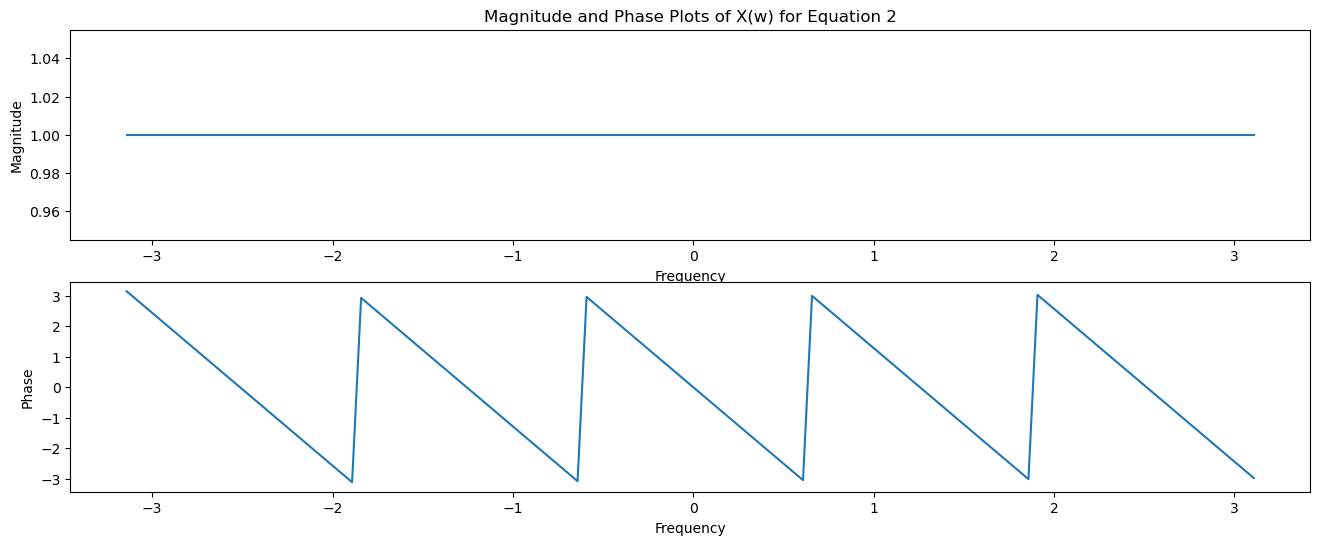

In [164]:
X_51_2_2 = DTFT([0, 0, 0, 0, 0, 1, 0, 0], 0, w)

magnitude_51_2_2 = np.abs(X_51_2_2)
angle_51_2_2 = np.angle(X_51_2_2)

plt.subplot(2,1,1)
plt.plot(w, magnitude_51_2_2)
plt.title("Magnitude and Phase Plots of X(w) for Equation 2")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")


plt.subplot(2,1,2)
plt.plot(w, angle_51_2_2)
plt.xlabel("Frequency")
plt.ylabel("Phase")


Text(0, 0.5, 'Phase')

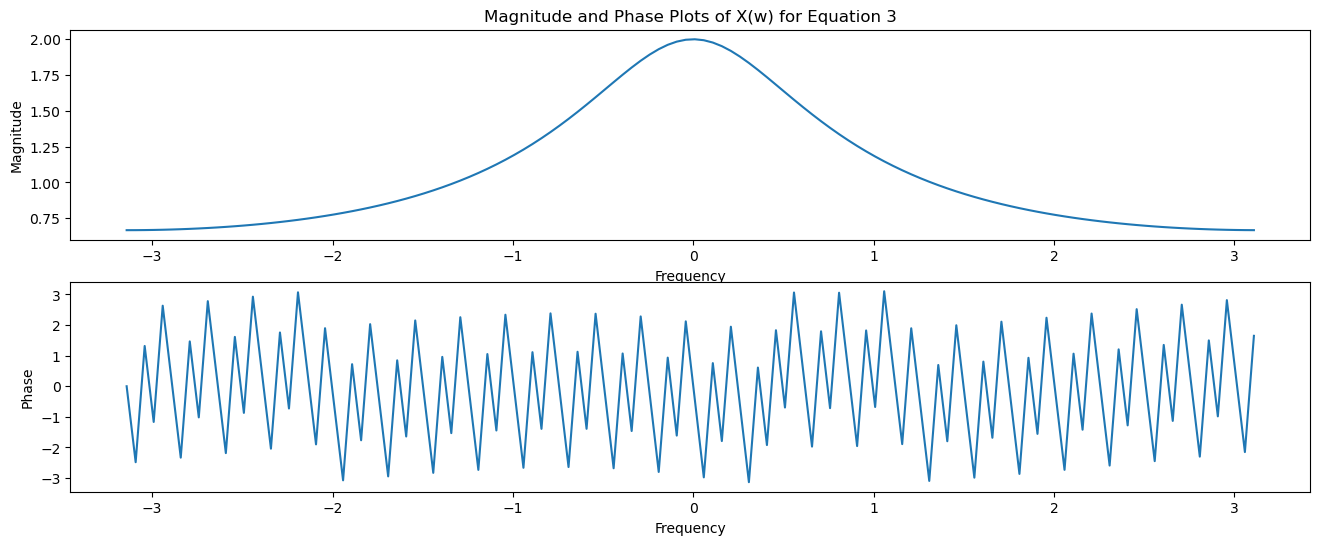

In [195]:
x = np.arange(-50,50)
unit_step = (x >= 0).astype(float)
X_51_2_3 = DTFT((0.5 ** x) * unit_step , 0, w)

magnitude_51_2_3 = np.abs(X_51_2_3)
angle_51_2_3 = np.angle(X_51_2_3)

plt.subplot(2,1,1)
plt.plot(w, magnitude_51_2_3)
plt.title("Magnitude and Phase Plots of X(w) for Equation 3")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")


plt.subplot(2,1,2)
plt.plot(w, angle_51_2_3)
plt.xlabel("Frequency")
plt.ylabel("Phase")

<h3 style="color:red;"><left>Exercise 5.2: Magnitude and Phase of the Frequency Response of a Discrete-Time Systems</left></h3>

Consider the discrete-time system described by the following difference equation:

\begin{equation}y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]\end{equation}

Assume that the system is **causal**.

**1. Draw a system diagram.**

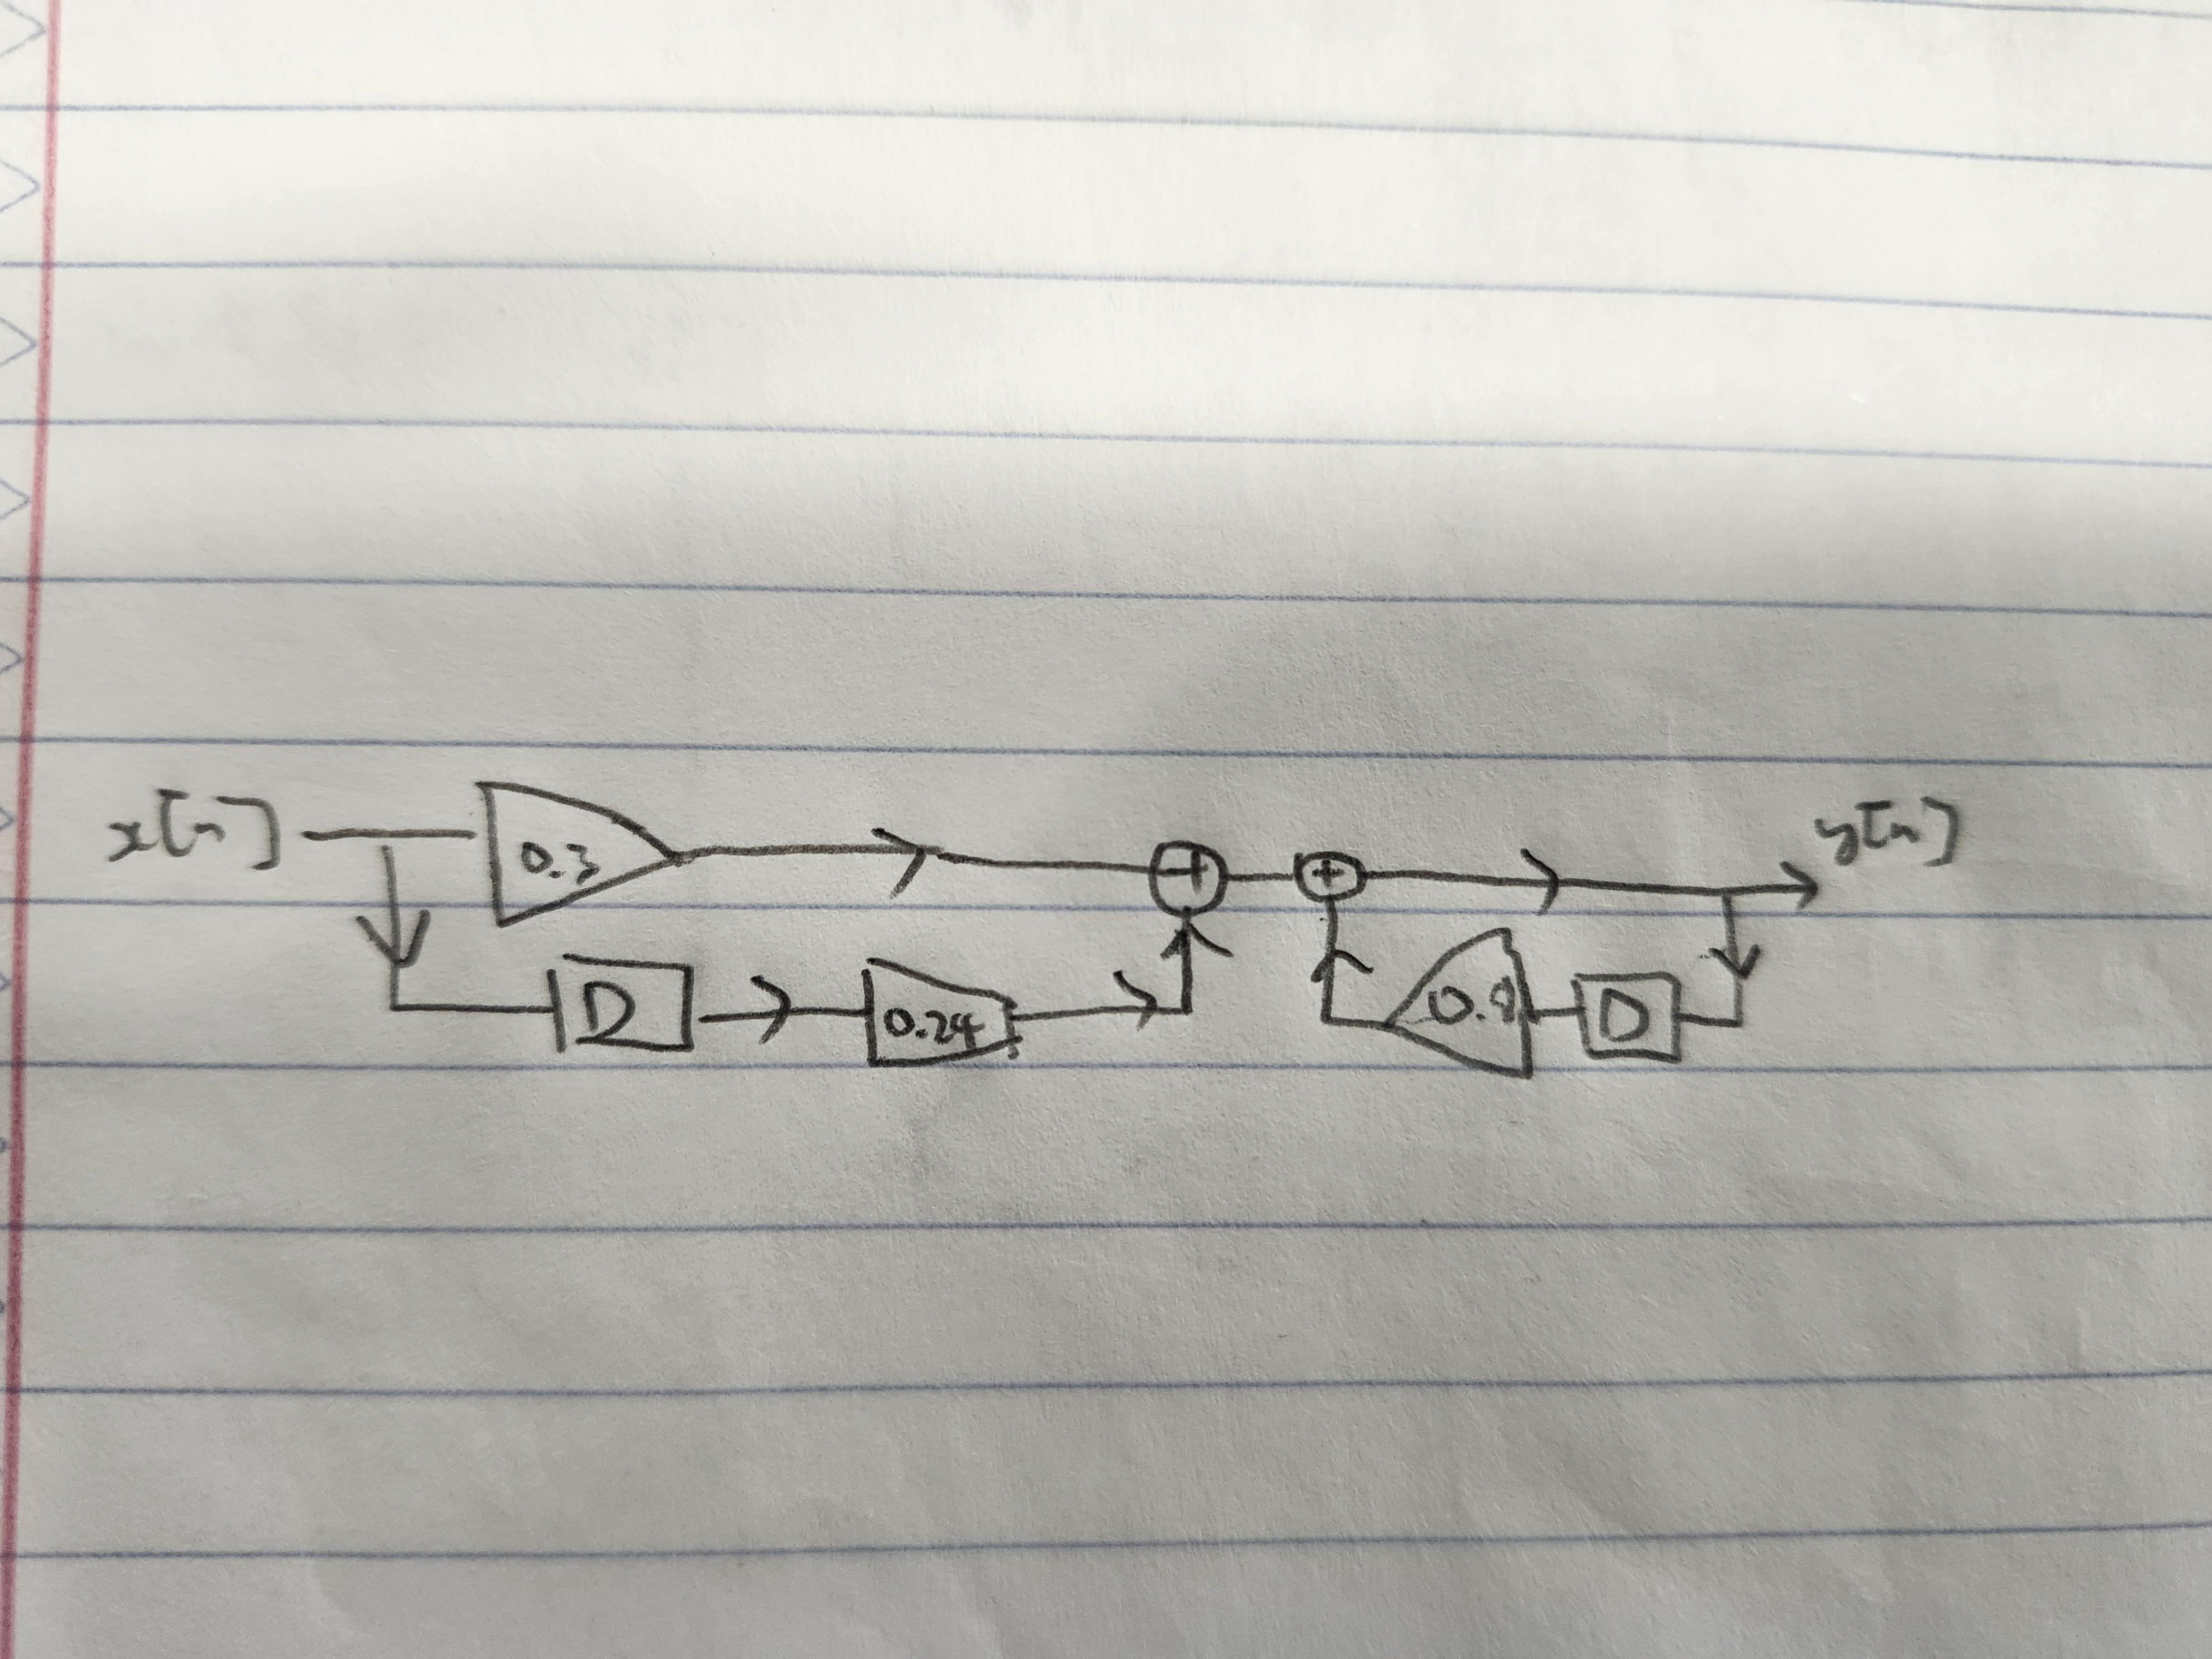

**2. Obtain the impulse response of the system by replacing $x[n]$ with $\delta[n]$ in the above equation. (Use causality to set up the initial conditions.)**

$h[n]$ = 0.9$h[n-1]$ + 0.3$\delta[n]$ + 0.24 $\delta[n-1]$

**3. Use your answer in Q2 to obtain the frequency response of the system.**

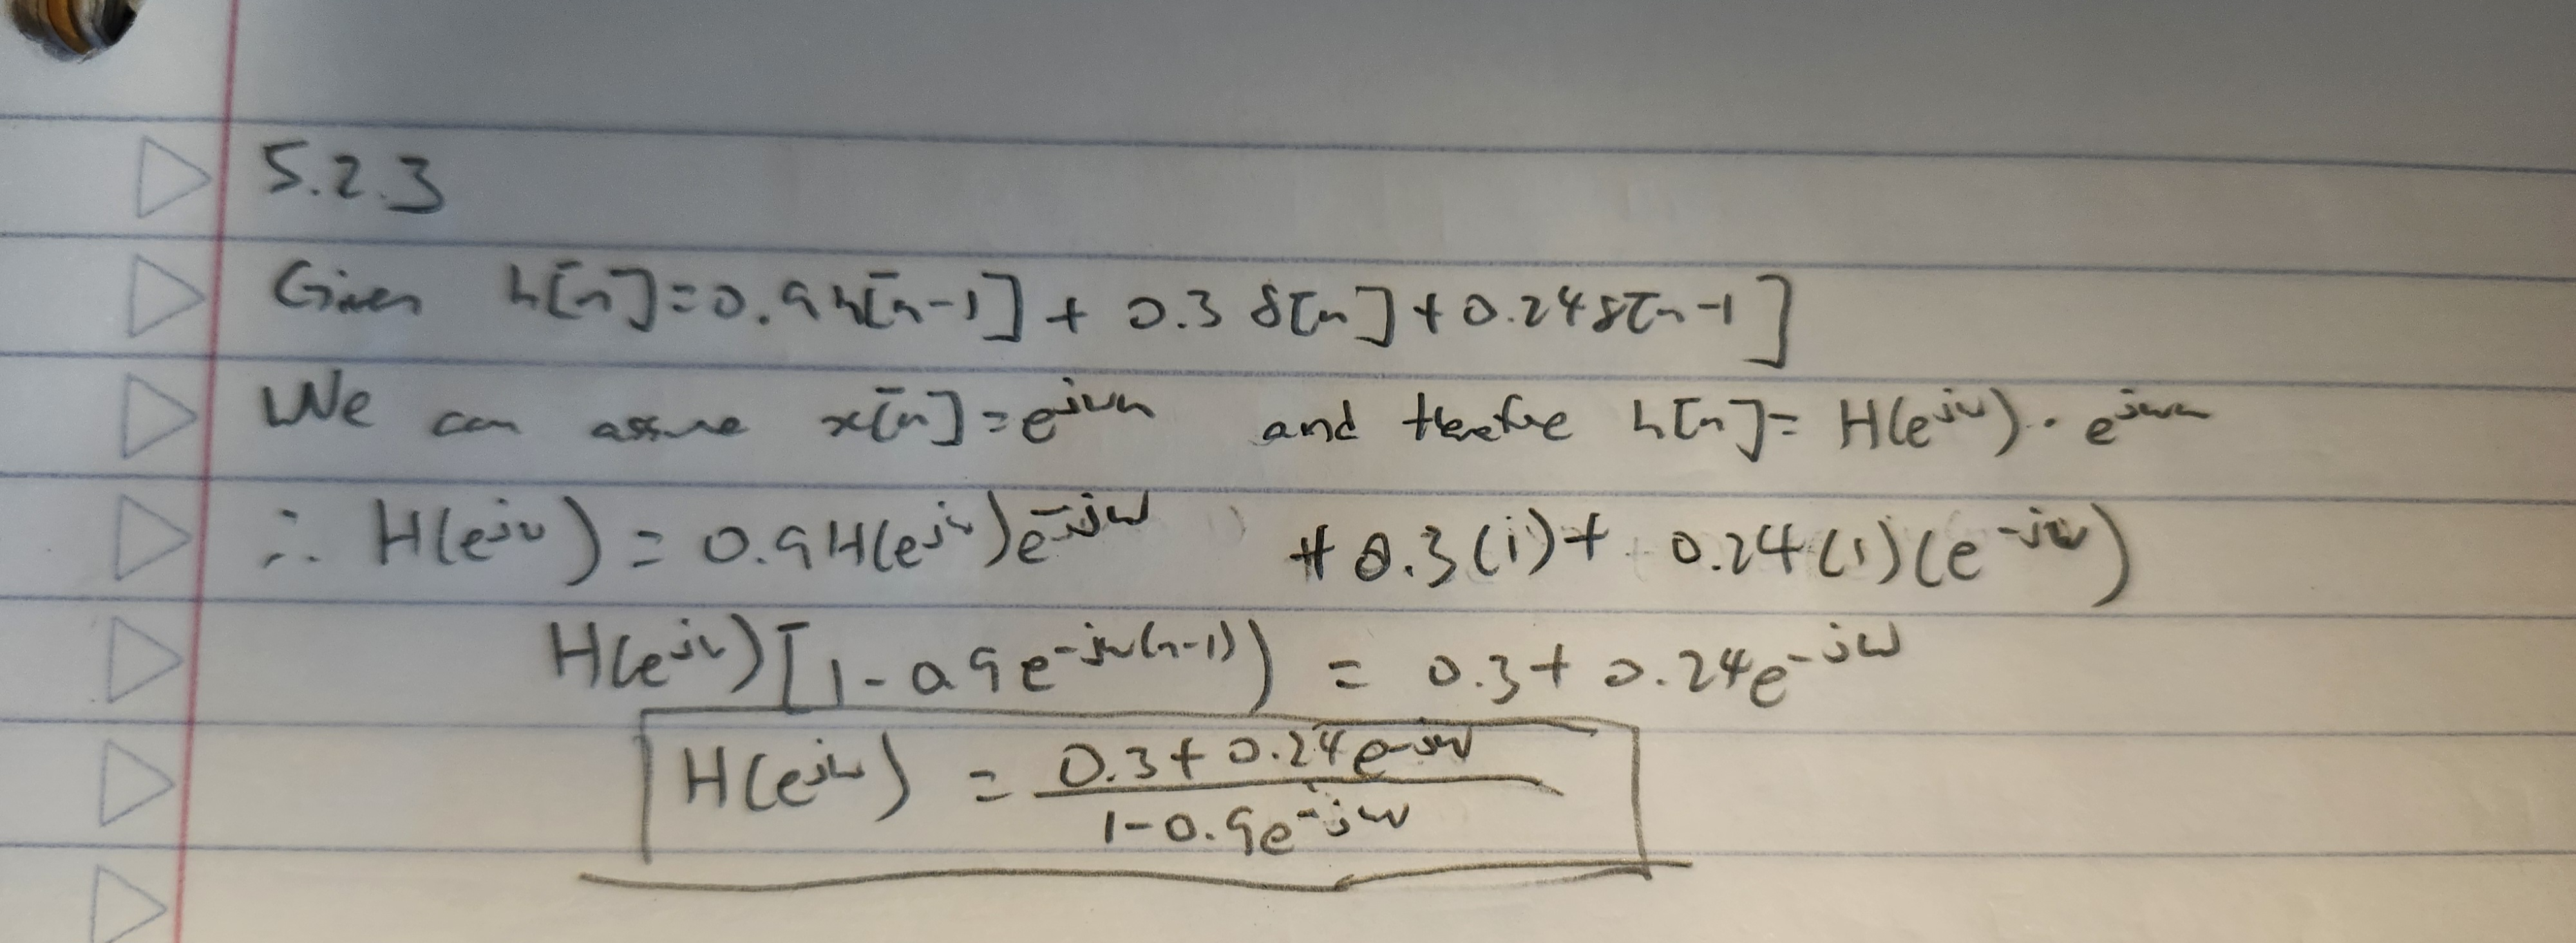

**4. Find the frequency response of the system using another method. Specifically, take the DTFT of the left-hand-side and right-hand-side of the difference equation, and then use linearity and the time-shifting property of the DTFT along with the fact that $H(\omega)=\frac{Y(\omega)}{X(\omega)}$**

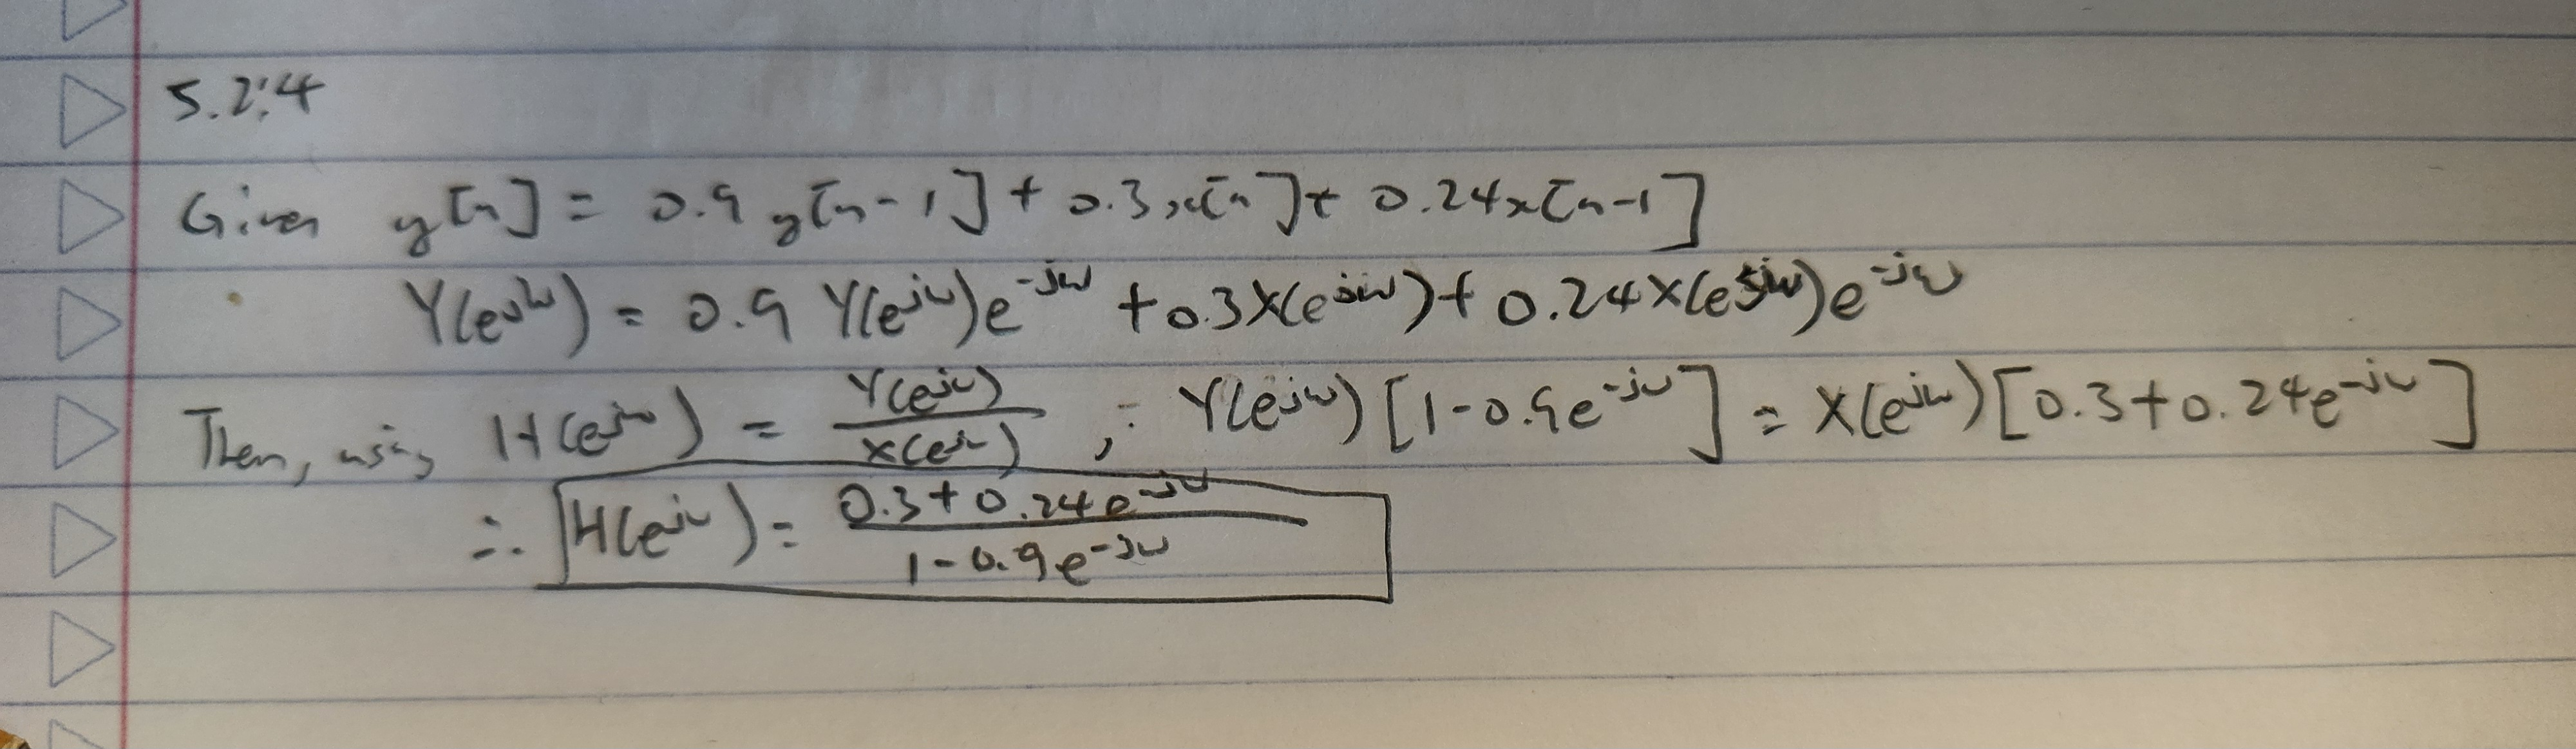

**5. Write Python code to compute and plot the magnitude and phase responses, $|H(\omega)|$ and $\angle H(\omega)$, for $-\pi<\omega<\pi$.**

0.6813926185794886


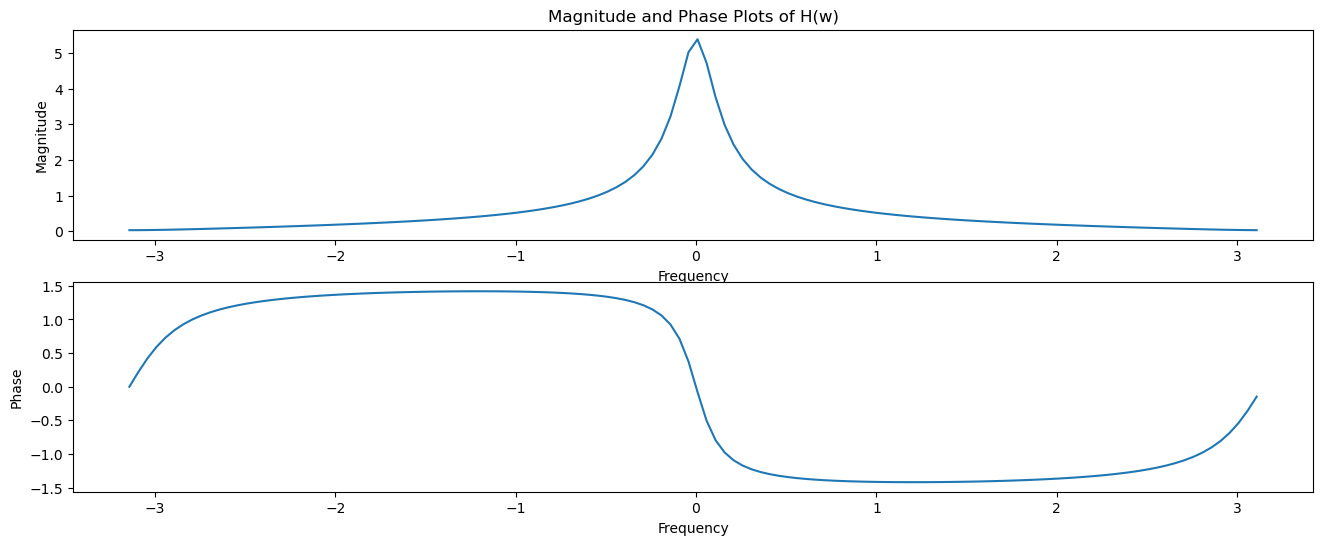

In [186]:
# write your code here
hejw_5_2 = (0.3 + 0.24 * np.exp(-1j * w)) / (1 - 0.9 * np.exp(-1j * w))                           
magnitude_5_2 = np.abs(hejw_5_2)
angle_5_2 = np.angle(hejw_5_2)

plt.subplot(2,1,1)
plt.plot(w, magnitude_5_2)
plt.title("Magnitude and Phase Plots of H(w)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")


plt.subplot(2,1,2)
plt.plot(w, angle_5_2)
plt.xlabel("Frequency")
plt.ylabel("Phase")

test_x = (0.3 + 0.24 * np.exp(-1j * np.pi / 4)) / (1 - 0.9 * np.exp(-1j * np.pi / 4))     
print(np.abs(test_x))

<h3 style="color:red;"><left>Exercise 5.3</left></h3>

**1. Insert the printout of your completed block diagram.**

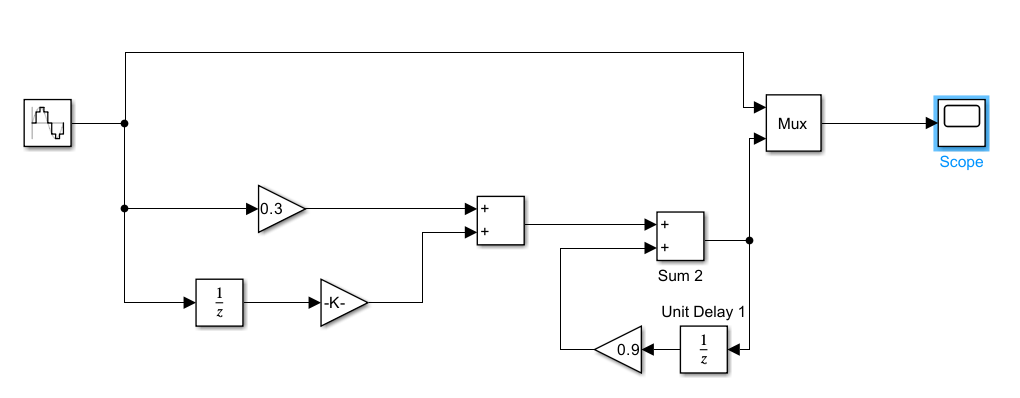

**2. Enter both the amplitude measurements you made and their theoretical values.**

| $\omega$ | Measurements | Theoretical Values |
|:--------:|:------------:|:------------------:|
| $\pi/16$ |      2.531        |        2.545       |
|  $\pi/8$ |       1.374      |        1.382       |
|  $\pi/4$ |       0.674       |        0.681       |

**3. Plot the impulse response, and the magnitude and phase of the frequency response by using your DTFT function.**

0.6813926185794886


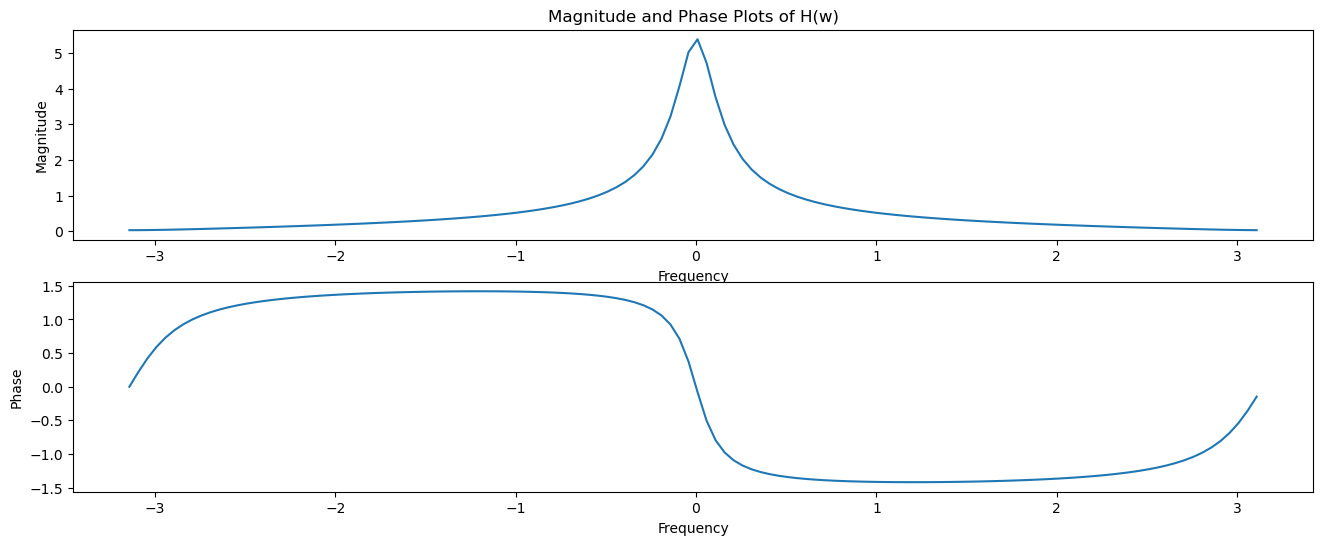

In [189]:
# write your code here

hejw_5_2 = (0.3 + 0.24 * np.exp(-1j * w)) / (1 - 0.9 * np.exp(-1j * w))                           
magnitude_5_2 = np.abs(hejw_5_2)
angle_5_2 = np.angle(hejw_5_2)

plt.subplot(2,1,1)
plt.plot(w, magnitude_5_2)
plt.title("Magnitude and Phase Plots of H(w)")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")


plt.subplot(2,1,2)
plt.plot(w, angle_5_2)
plt.xlabel("Frequency")
plt.ylabel("Phase")

test_x = (0.3 + 0.24 * np.exp(-1j * np.pi / 4)) / (1 - 0.9 * np.exp(-1j * np.pi / 4))     
print(np.abs(test_x))